<a href="https://colab.research.google.com/github/VineetGp/Logistic-Regression/blob/main/perceptron_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X,y = make_classification(n_samples=100,n_features=2,n_classes=2,class_sep=15,n_redundant=0,
                          hypercube=False,n_informative=1, n_clusters_per_class=1, random_state=41)

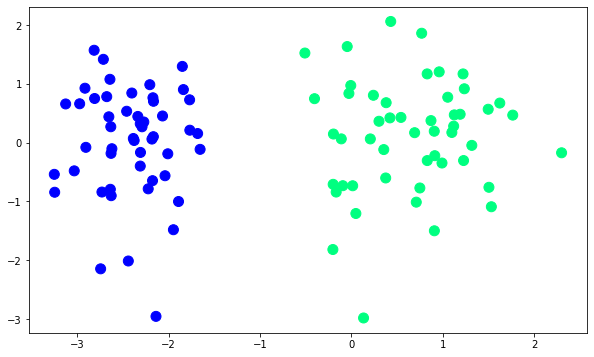

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def perceptron(X,y,epoch):
  X = np.insert(X,0,1,axis=1)
  weights = np.random.randint(0,1,size=X.shape[1])
  lr = 0.1
  for i in range(epoch):
    j = np.random.randint(0,100)
    z = np.dot(weights,X[j])
    y_hat = step(z)
    weights = weights + lr*(y[j]-y_hat)*X[j]
  return weights[1:], weights[0]

def step(z):
  return 1 if z>0 else 0

In [5]:
coef_, intercept_ = perceptron(X,y,2500)
print(coef_)
print(intercept_)

[ 0.31768836 -0.02026871]
0.30000000000000004


In [6]:
# Our eqn is in form w0 + w1*X1 + w2*X2 = 0 --> X2 = -(w1/w2)*X1 -(w0/w2) (y=mx+c form)
# m = -(w1/w2) = -(coeff[0]/coeff[1]) and c = -(intercept/coeff[1])
m = -(coef_[0]/coef_[1])
c = -(intercept_/coef_[1])
print(m)
print(c)

15.673830430710408
14.801137803475202


In [7]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

(-3.0, 2.0)

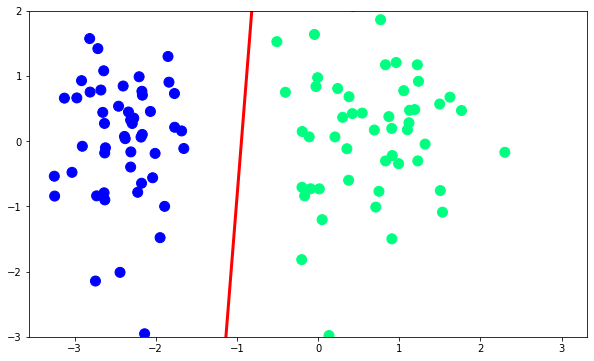

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Using sklearn implementation:

In [9]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [10]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [11]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

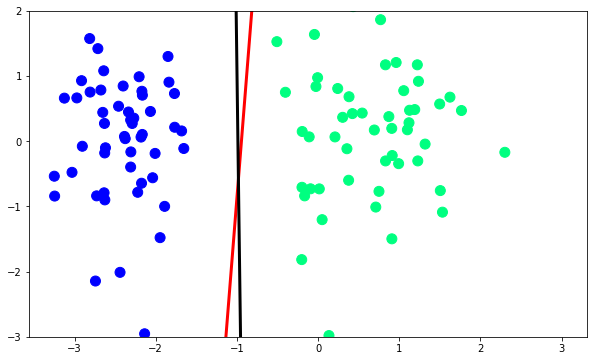

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)
plt.ylim(-3,2)

Text(0, 0.5, 'X2')

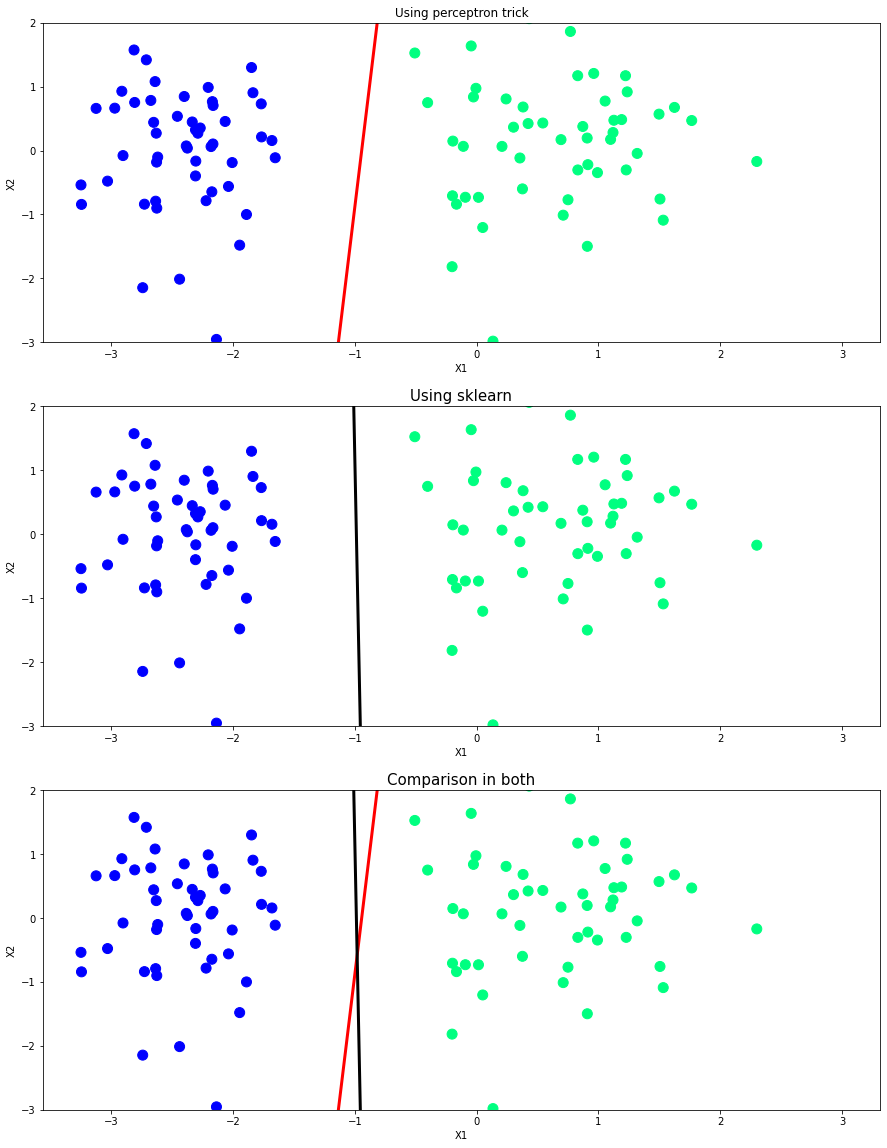

In [13]:
fig,ax = plt.subplots(3,1,figsize=(15,20))
#fig.tight_layout()
ax[0].plot(x_input,y_input,color='red',linewidth=3)
ax[0].scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)
ax[0].set_ylim([-3,2])
ax[0].set(title='Using perceptron trick', xlabel='X1', ylabel='X2')

ax[1].plot(x_input1,y_input1,color='black',linewidth=3)
ax[1].scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)
ax[1].set_ylim([-3,2])
ax[1].set_title('Using sklearn', fontsize=15)
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')

ax[2].plot(x_input,y_input,color='red',linewidth=3)
ax[2].plot(x_input1,y_input1,color='black',linewidth=3)
ax[2].scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)
ax[2].set_ylim([-3,2])
ax[2].set_title('Comparison in both', fontsize=15)
ax[2].set_xlabel('X1')
ax[2].set_ylabel('X2')

### For creating animation of each epoch

In [14]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [15]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [16]:
m,b = perceptron(X,y)

In [17]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
